In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_excel('File.xlsx', sheet_name = "Data")
df.head()

,Created Date,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time
0,28.02.2020,Portugal,Lisbon,7238.0,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13.0,89.30,0.0,17.7
1,28.02.2020,Portugal,Lisbon,12758.0,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1.0,10.00,0.0,16.3
2,28.02.2020,Portugal,Lisbon,6631.0,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2.0,16.96,0.0,13.6
3,28.02.2020,Portugal,Lisbon,10535.0,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3.0,25.15,4.2,26.1
4,28.02.2020,Portugal,Lisbon,9695.0,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3.0,16.00,0.0,11.6


In [4]:
df['Created Date'] = pd.to_datetime(df['Created Date'],format="%d.%m.%Y")
df['Period'] = pd.to_datetime(df['Created Date'],format="%d.%m.%Y").dt.to_period('M')
df.set_index('Created Date',inplace=True)
df.head()

,Country,City,Restaurant ID,Restaurant Name,Order State,Cancel Reason,Cuisine,Platform,Payment Method,Card Issuer,Products in Order,Order Value € (Gross),Delivery Fee,Delivery Time,Period
Created Date,,,,,,,,,,,,,,,
2020-02-28,Portugal,Lisbon,7238.0,Chirashi - Alvalade,delivered,NaN,Sushi,ios,cashless,BANKINTER S.A.,13.0,89.30,0.0,17.7,2020-02
2020-02-28,Portugal,Lisbon,12758.0,Istanbul Kebab Pizza - Alameda,delivered,NaN,Pizza,android,cashless,BANCO COMERCIAL PORTUGUES S.A.,1.0,10.00,0.0,16.3,2020-02
2020-02-28,Portugal,Lisbon,6631.0,A-100 - Lisboa,delivered,NaN,Burgers,ios,cashless,BANCO COMERCIAL PORTUGUES S.A.,2.0,16.96,0.0,13.6,2020-02
2020-02-28,Portugal,Lisbon,10535.0,La Paparrucha - Parrilla Argentina,delivered,NaN,South American,ios,cashless,ING BANK N.V.,3.0,25.15,4.2,26.1,2020-02
2020-02-28,Portugal,Lisbon,9695.0,Choupana Caffe,delivered,NaN,Brunch,ios,cashless,INTESA SANPAOLO SPA,3.0,16.00,0.0,11.6,2020-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99618 entries, 2020-02-28 to 2020-01-01
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   Country                99618 non-null  object   
 1   City                   99618 non-null  object   
 2   Restaurant ID          99618 non-null  float64  
 3   Restaurant Name        99618 non-null  object   
 4   Order State            99618 non-null  object   
 5   Cancel Reason          1682 non-null   object   
 6   Cuisine                99291 non-null  object   
 7   Platform               87684 non-null  object   
 8   Payment Method         99618 non-null  object   
 9   Card Issuer            86906 non-null  object   
 10  Products in Order      99618 non-null  float64  
 11  Order Value € (Gross)  97936 non-null  float64  
 12  Delivery Fee           97936 non-null  float64  
 13  Delivery Time          97936 non-null  float64  
 14  Perio

In [6]:
df['Country'].unique()

array(['Portugal', 'Ghana'], dtype=object)

In [7]:
df_Portugal = pd.DataFrame(df[(df['Country'] == 'Portugal')].reindex())
df_Ghana = pd.DataFrame(df[(df['Country'] == 'Ghana')].reindex())

df_orders_portugal = pd.DataFrame(df_Portugal[(df_Portugal['Cancel Reason'].isna())].groupby('Created Date')['Country'].count())
df_orders_portugal.columns = ['Orders']

df_orders_ghana = pd.DataFrame(df_Ghana[(df_Ghana['Cancel Reason'].isna())].groupby('Created Date')['Country'].count())
df_orders_ghana.columns = ['Orders']

df_orders_portugal.Name = 'Portugal' 
df_orders_ghana.Name = 'Ghana'
df_list = (df_orders_portugal, df_orders_ghana)

1. Do we have any seasonality in the countries shown?

Portugal
Ghana


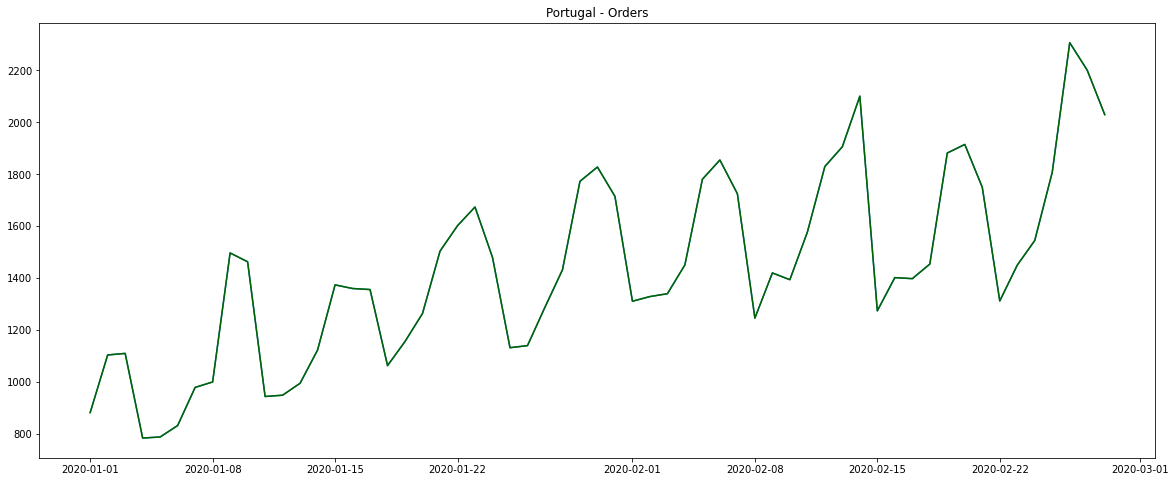

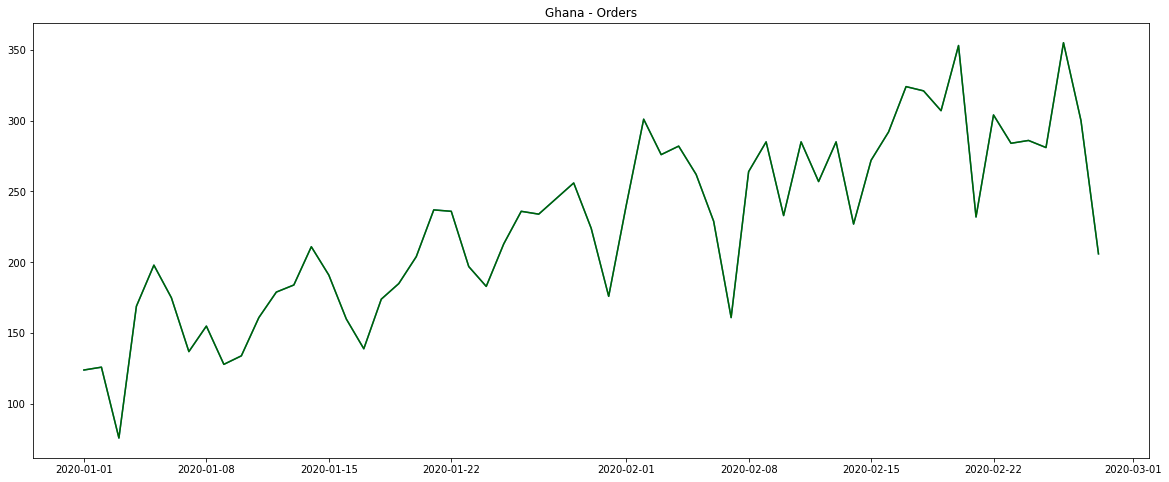

In [34]:
for i in df_list:
    print(i.Name)
    plt.figure(figsize=(20,8))
    plt.title(f'{i.Name} - Orders')
    plt.plot(i, label=f'{i.Name} Original Orders')
    plt.plot(i, label=f'{i.Name}Forecast Orders',color="darkgreen")

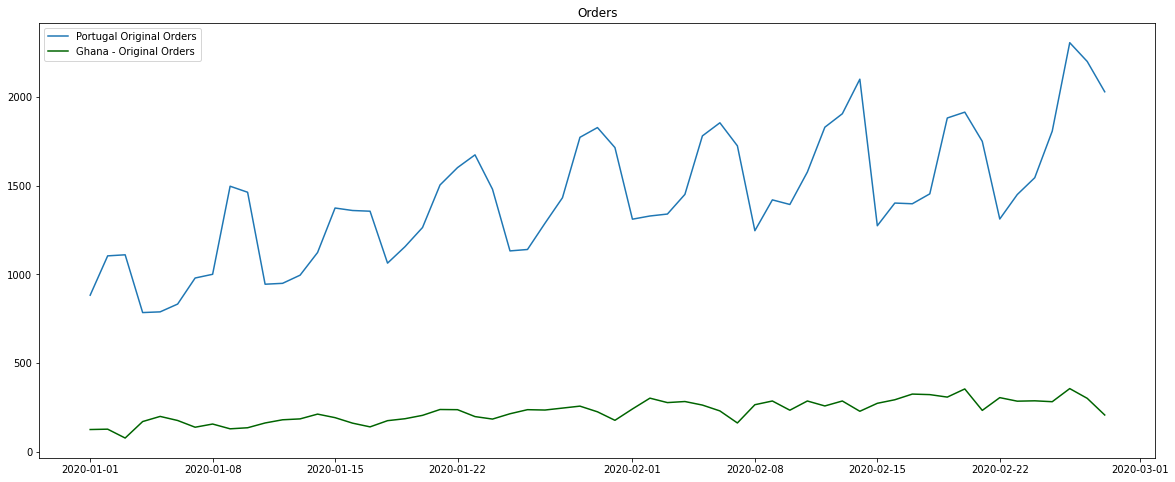

In [26]:
plt.figure(figsize=(20,8))
plt.title(f'Orders')
plt.plot(df_orders_portugal, label=f'{df_orders_portugal.Name} Original Orders')
plt.plot(df_orders_ghana, label=f'{df_orders_ghana.Name} - Original Orders' , color='darkgreen')
plt.legend()

Portugal
Ghana


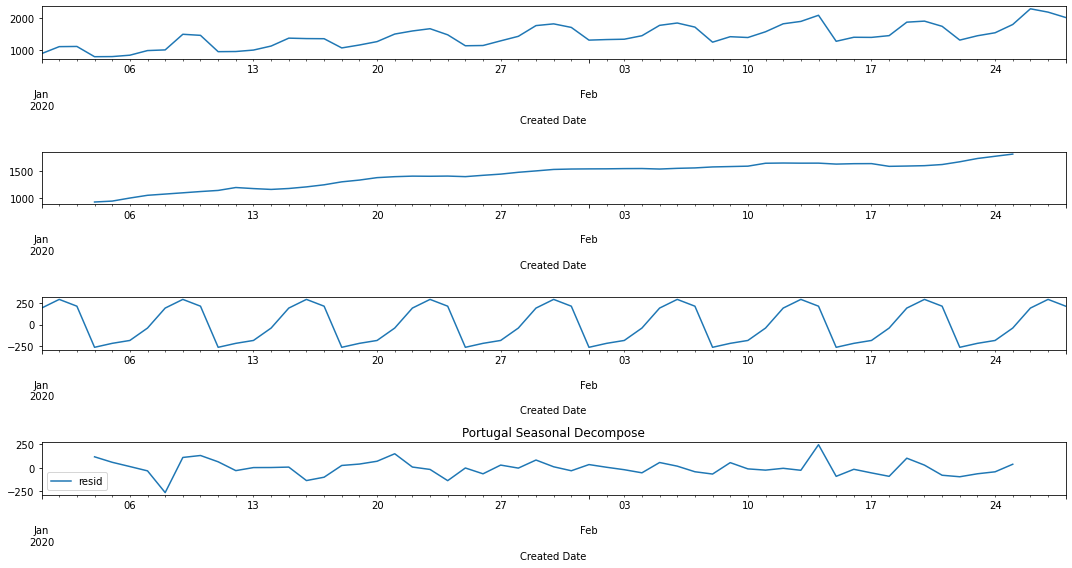

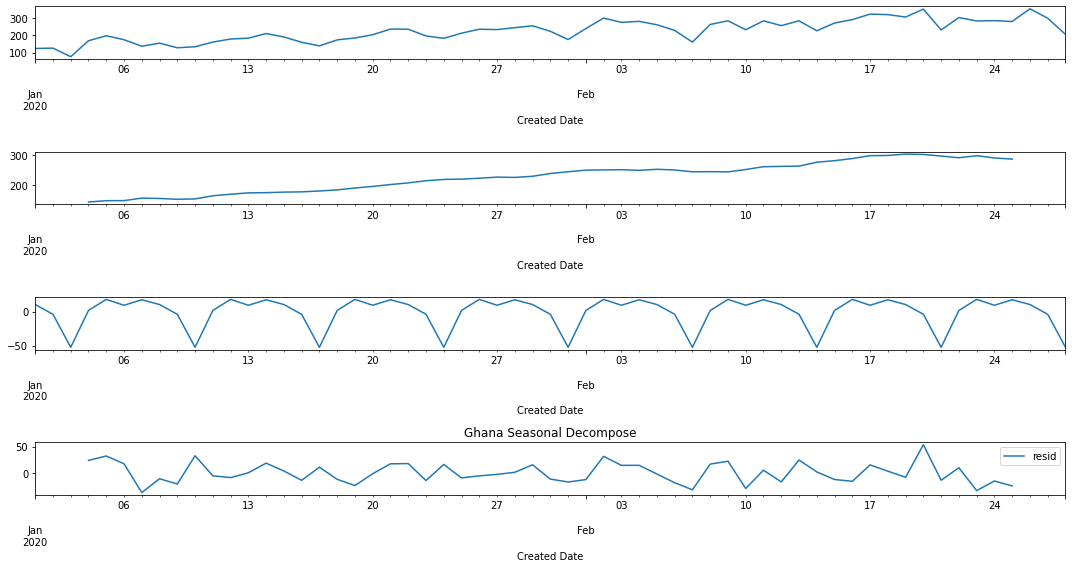

In [17]:
#Salvar a decoposição em result
def plotsSeasonalDecompose():
    for i in df_list:
        print(i.Name)
        result = seasonal_decompose(i)
        fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
        plt.title(f'{i.Name} Seasonal Decompose')
        result.observed.plot(ax=ax1)
        result.trend.plot(ax=ax2)
        result.seasonal.plot(ax=ax3)
        result.resid.plot(ax=ax4)
        plt.tight_layout()
        plt.legend()

plotsSeasonalDecompose()

In [9]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

    for key, value in result[4].items():
	    print('\t{}: {:.4f}'.format(key, value))
    

In [10]:
for i in df_list:
    print(i.Name)
    adfuller_test(i)

Portugal
ADF Test Statistic : -1.4503088851109012
p-value : 0.5579341752938872
#Lags Used : 7
Number of Observations Used : 51
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
	1%: -3.5656
	5%: -2.9201
	10%: -2.5980
Ghana
ADF Test Statistic : -1.378668173525477
p-value : 0.5924590686576823
#Lags Used : 7
Number of Observations Used : 51
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
	1%: -3.5656
	5%: -2.9201
	10%: -2.5980


In [11]:
# Seasonal - fit stepwise auto-ARIMA
import pmdarima as pm
def autoSeasonalModel(data):
    smodel = pm.auto_arima(data, start_p=1, start_q=1,
                            test='adf',
                            max_p=1, max_q=1, m=7,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

    smodel.summary()
    return smodel

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=657.731, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=676.999, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=656.645, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=659.691, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=698.671, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=666.923, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=658.221, Time=0.25 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=657.792, Time=0.21 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=655.952, Time=0.12 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=657.825, Time=0.24 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=659.739, Time=0.29 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=669.986, Time=0.08 sec
 ARIMA(1,0,0)(0,1,1)[7]             : AIC=664.532, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,1,1)[7] intercept
Total fit time: 1.768 seconds


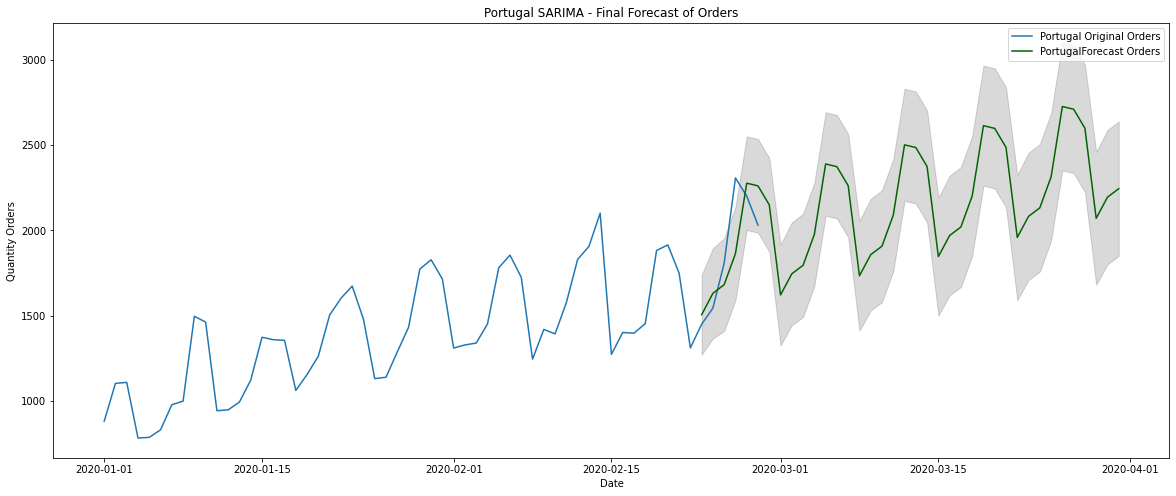

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=496.312, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=517.403, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=509.175, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=495.543, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=503.152, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=497.347, Time=0.10 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=497.210, Time=0.09 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=501.167, Time=0.05 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=499.073, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=511.965, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=504.410, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(0,1,1)(0,1,1)[7]          
Total fit time: 0.943 seconds


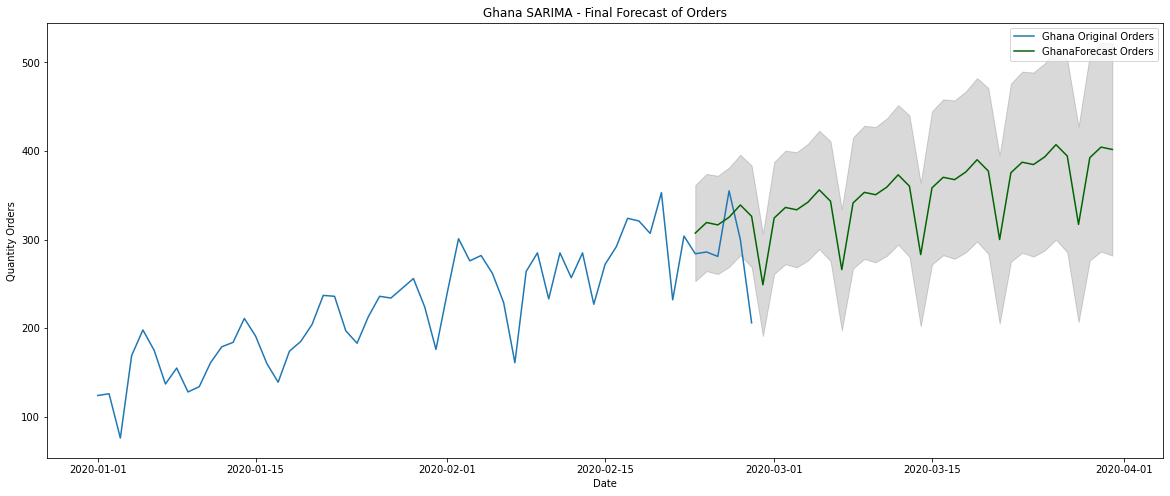

In [35]:
# Forecast  
for i in df_list:
    n_periods = 38
    fitted, confint = autoSeasonalModel(i).predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(i.index[-6], periods = n_periods, freq='D')

    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    if i.Name == "Portugal":
        df_future_portugal=pd.concat([i,pd.DataFrame(fitted_series,columns=["Forecast"])])
    else:
        df_future_ghana=pd.concat([i,pd.DataFrame(fitted_series,columns=["Forecast"])])
        

    # Plot
    plt.figure(figsize=(20,8))
    plt.plot(i, label=f'{i.Name} Original Orders')
    plt.plot(fitted_series, label=f'{i.Name}Forecast Orders' , color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title(f'{i.Name} SARIMA - Final Forecast of Orders')
    plt.xlabel('Date')
    plt.ylabel('Quantity Orders')
    plt.legend()
    plt.show()


In [48]:
df_future_portugal[(df_future_portugal.index.to_period('M') == '2020-02')].sum()

Orders      45994.000000
Forecast    13369.988365
dtype: float64

In [46]:
df_future_portugal[(df_future_portugal.index.to_period('M') > '2020-02')].sum()

Orders          0.000000
Forecast    67872.471166
dtype: float64

In [49]:
df_future_ghana[(df_future_ghana.index.to_period('M') == '2020-02')].sum()

Orders      7704.000000
Forecast    2182.684903
dtype: float64

In [47]:
df_future_ghana[(df_future_ghana.index.to_period('M') > '2020-02')].sum()

Orders          0.000000
Forecast    11121.008297
dtype: float64